In [15]:
import cv2
import random
import os

def extract_random_frames(video_path, output_dir, num_frames=10):
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Open the video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Cannot open video file.")
        return

    # Get total frame count
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Get num_frames unique random frame indices
    frame_indices = sorted(random.sample(range(total_frames), min(num_frames, total_frames)))

    print(f"Extracting frames at indices: {frame_indices}")

    # Loop through the video and save the selected frames
    for i, frame_index in enumerate(frame_indices):
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
        ret, frame = cap.read()
        if ret:
            output_path = os.path.join(output_dir, f"{i+1}.jpg")
            cv2.imwrite(output_path, frame)
        else:
            print(f"Warning: Could not read frame at index {frame_index}")

    cap.release()
    print("Done.")

# Example usage:
video_file = r"C:\Users\mahdi\Downloads\Video\3 Deepfake Video Examples That Will Blow Your Mind.mp4"
output_folder = r"C:\Users\mahdi\Desktop\output_frames"
extract_random_frames(video_file, output_folder)


Extracting frames at indices: [1656, 2040, 2244, 2794, 2796, 3498, 3656, 3682, 3727, 3737]
Done.


In [4]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import os

In [5]:
model = load_model("final_inceptionresnetv2_deepfake_model_99_new.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
Raw prediction: 0.9999513626098633
Predicted label: Real
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
Raw prediction: 0.996026873588562
Predicted label: Real
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
Raw prediction: 0.9999997615814209
Predicted label: Real
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
Raw prediction: 0.9999986886978149
Predicted label: Real
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Raw prediction: 0.9998090863227844
Predicted label: Real
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Raw prediction: 2.674549978110008e-05
Predicted label: Fake
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
Raw prediction: 6.420782301574945e-05
Predicted label: Fake
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
Raw prediction: 0.00018561469914857298
Predicted label: Fake
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
Raw prediction: 0.07154171168804169
Predicted label: Fake
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Raw prediction: 0.0002635213313624263
Predicted label: Fake


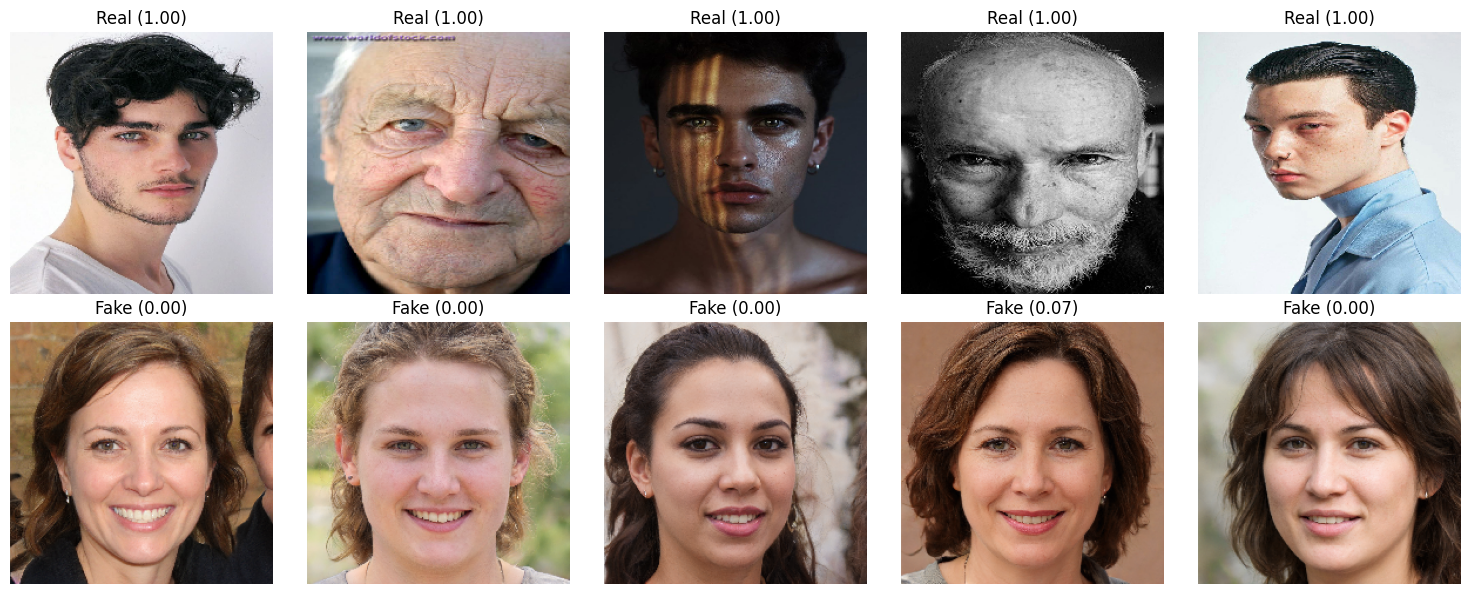

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt

path_to_image1 = r"C:\Users\mahdi\Desktop\output_frames\1.jpg"
path_to_image2 = r"C:\Users\mahdi\Desktop\output_frames\2.jpg"
path_to_image3 = r"C:\Users\mahdi\Desktop\output_frames\3.jpg"
path_to_image4 = r"C:\Users\mahdi\Desktop\output_frames\4.jpg"
path_to_image5 = r"C:\Users\mahdi\Desktop\output_frames\5.jpg"
path_to_image6 = r"C:\Users\mahdi\Desktop\output_frames\6.png"
path_to_image7 = r"C:\Users\mahdi\Desktop\output_frames\7.png"
path_to_image8 = r"C:\Users\mahdi\Desktop\output_frames\8.png"
path_to_image9 = r"C:\Users\mahdi\Desktop\output_frames\9.png"
path_to_image10 = r"C:\Users\mahdi\Desktop\output_frames\10.png"

def load_and_predict(path):
    img = tf.keras.utils.load_img(path, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array = img_array / 255.0

    prediction = float(model.predict(img_array)[0][0]) 
    print("Raw prediction:", prediction) 
    label = "Real" if prediction >= 0.5 else "Fake"
    print("Predicted label:", label) 
    return img, label, prediction

img1, label1, pred1 = load_and_predict(path_to_image1)
img2, label2, pred2 = load_and_predict(path_to_image2)
img3, label3, pred3 = load_and_predict(path_to_image3)
img4, label4, pred4 = load_and_predict(path_to_image4)
img5, label5, pred5 = load_and_predict(path_to_image5)
img6, label6, pred6 = load_and_predict(path_to_image6)
img7, label7, pred7 = load_and_predict(path_to_image7)
img8, label8, pred8 = load_and_predict(path_to_image8)
img9, label9, pred9 = load_and_predict(path_to_image9)
img10, label10, pred10 =load_and_predict(path_to_image10)


plt.figure(figsize=(15, 6))

# Adjust the grid layout to 2 rows and 5 columns
plt.subplot(2, 5, 1)
plt.imshow(img1)
plt.title(f"{label1} ({pred1:.2f})")
plt.axis('off')

plt.subplot(2, 5, 2)
plt.imshow(img2)
plt.title(f"{label2} ({pred2:.2f})")
plt.axis('off')

plt.subplot(2, 5, 3)
plt.imshow(img3)
plt.title(f"{label3} ({pred3:.2f})")
plt.axis('off')

plt.subplot(2, 5, 4)
plt.imshow(img4)
plt.title(f"{label4} ({pred4:.2f})")
plt.axis('off')

plt.subplot(2, 5, 5)
plt.imshow(img5)
plt.title(f"{label5} ({pred5:.2f})")
plt.axis('off')

plt.subplot(2, 5, 6)
plt.imshow(img6)
plt.title(f"{label6} ({pred6:.2f})")
plt.axis('off')

plt.subplot(2, 5, 7)
plt.imshow(img7)
plt.title(f"{label7} ({pred7:.2f})")
plt.axis('off')

plt.subplot(2, 5, 8)
plt.imshow(img8)
plt.title(f"{label8} ({pred8:.2f})")
plt.axis('off')

plt.subplot(2, 5, 9)
plt.imshow(img9)
plt.title(f"{label9} ({pred9:.2f})")
plt.axis('off')

plt.subplot(2, 5, 10)
plt.imshow(img10)
plt.title(f"{label10} ({pred10:.2f})")
plt.axis('off')

plt.tight_layout()
plt.show()